In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import zeyrek
from TurkishStemmer import TurkishStemmer

%matplotlib inline

In [ ]:
# Importing Data Set
df = pd.read_csv("/Desktop/entries_processed.csv")

In [89]:
print(df.describe())

                                Entry Author              Date  \
count                           20242  20242             20242   
unique                          19023  11931             17858   
top     (bkz: derdini sikeyim butonu)   oric  23.02.2020 14:34   
freq                                7     87                12   
first                             NaN    NaN               NaN   
last                              NaN    NaN               NaN   

                                                Old_Topic  \
count                                               20242   
unique                                                302   
top     kadıköy sokaklarında amaçsızca tek başına dola...   
freq                                                 1050   
first                                                 NaN   
last                                                  NaN   

                                                New_Topic Edited  \
count                                    

<ipython-input-89-772c287cbb5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe())


In [20]:
print(df.values)

[["arife gunu yarim gun mesaisini yapmami$, tembel belediye modeli.. binasi hasanpa$a'dadir.."
  'ssg' '21.02.2002 12:03 ~ 12:03' ... '2022-09-19 12:03:00'
  'arife gunu yarim gun mesaisini yapmami tembel belediye modeli binasi hasanpa dadir'
  'arif gun yarim gun mesai yapmami tembel beledi mode binasi hasanp dadir']
 ["sorumluluklarin %50sini yerine getirse, kadikoy'u daha sevecen ve ya$anabilecek bi yer haline donu$turebilecek guc."
  'deadpoem' '11.01.2003 16:24' ... nan
  'sorumluluklarin getirse kadikoy sevecen anabilecek bi yer haline donu turebilecek guc'
  'sorumluluklari getir kadikoy sevecen anabilecek bi yer halin don turebilecek guc']
 ['sağa sola kent yaşamının gerçek sahibi yayalardır yazan, başında selami öztürkün bulunduğu belediyemiz..'
  'melancholyman' '01.02.2003 02:10 ~ 02:12' ... '2022-09-19 02:12:00'
  'sağa sola kent yaşamının gerçek sahibi yayalardır yazan başında selami öztürkün bulunduğu belediyemiz'
  'sak sol kent yaşam gerçek sahip yaya yazan baş selami ö

In [96]:
df.Author.value_counts()

oric                                   87
mukatta                                70
uzunada1969                            54
kelebeklerinviziltisi                  48
ikitam1bolu2                           47
                                       ..
cikcikci                                1
3 yil sonra                             1
juuzou                                  1
ol babda emr u ferman                   1
kafkaslardan gelmisem bu topraklara     1
Name: Author, Length: 11931, dtype: int64

In [113]:
df["New_Topic"].value_counts().head(30)

kadıköy sokaklarında amaçsızca tek başına dolanmak    1050
23 şubat 2020 kadıköy belediyesi paylaşımı             678
moda                                                   635
caddebostan sahili                                     627
caddebostan sahilini suriyelilerin istila etmesi       607
haydarpaşa garı                                        535
kadıköy belediyesi                                     465
kadıköy ve şişli türkiye'nin kaymağını yiyor           449
kozyatağı metrosu'ndaki silahlı adamlar                430
28 kasım 2010 haydarpaşa garı yangını                  347
kadıköy bel.'nin göz kamaştıran kaldırım tamiri        346
moda sahilinde oral seks yapan amca                    328
kadıköy'deki kentsel dönüşüm rezaleti                  310
kadıköy vs beşiktaş                                    309
doya doya moda                                         305
yeldeğirmeni                                           290
moda sahili                                            2

## Daily Entry Counts

In [55]:
df.groupby(["New_Topic","Entry_Date"])["Entry"].count()

New_Topic                           Entry_Date         
1 nisan 2021 kadıköy polis şiddeti  2021-01-04 19:12:00    1
                                    2021-01-04 19:18:00    2
                                    2021-01-04 19:24:00    2
                                    2021-01-04 19:28:00    1
                                    2021-01-04 19:29:00    1
                                                          ..
şanlı erenköy direnişi              2020-09-08 14:04:00    1
                                    2020-11-10 18:13:00    1
                                    2021-04-15 02:20:00    1
                                    2022-07-01 13:46:00    1
                                    2022-08-08 19:25:00    1
Name: Entry, Length: 17486, dtype: int64

In [56]:
df.groupby(["Entry_Date"])["Entry"].count()

Entry_Date
1999-03-28 00:00:00    1
1999-03-29 00:00:00    1
1999-06-27 00:00:00    1
1999-08-07 00:00:00    3
1999-08-10 00:00:00    1
                      ..
2022-12-09 12:51:00    1
2022-12-09 13:09:00    1
2022-12-09 13:44:00    1
2022-12-09 13:55:00    1
2022-12-09 17:23:00    1
Name: Entry, Length: 17382, dtype: int64

In [53]:
df

,Entry,Author,Date,Old_Topic,New_Topic,Edited,Entry_Date,Edit_Date,Processed_Entry,Stemmed_Entry
0,"arife gunu yarim gun mesaisini yapmami$, tembe...",ssg,21.02.2002 12:03 ~ 12:03,kadıköy belediyesi,kadıköy belediyesi,True,2002-02-21 12:03:00,2022-09-19 12:03:00,arife gunu yarim gun mesaisini yapmami tembel ...,arif gun yarim gun mesai yapmami tembel beledi...
1,"sorumluluklarin %50sini yerine getirse, kadiko...",deadpoem,11.01.2003 16:24,kadıköy belediyesi,kadıköy belediyesi,False,2003-11-01 16:24:00,NaN,sorumluluklarin getirse kadikoy sevecen anabil...,sorumluluklari getir kadikoy sevecen anabilece...
2,sağa sola kent yaşamının gerçek sahibi yayalar...,melancholyman,01.02.2003 02:10 ~ 02:12,kadıköy belediyesi,kadıköy belediyesi,True,2003-01-02 02:10:00,2022-09-19 02:12:00,sağa sola kent yaşamının gerçek sahibi yayalar...,sak sol kent yaşam gerçek sahip yaya yazan baş...
3,(bkz: kadikoy afet kriz merkezi),mercan,21.03.2003 18:46,kadıköy belediyesi,kadıköy belediyesi,False,2003-03-21 18:46:00,NaN,kadikoy afet kriz merkezi,kadikoy afet kriz merkez
4,internet sitesinde sahipsiz kedi ve köpekler i...,sai baba,03.08.2004 00:17,kadıköy belediyesi,kadıköy belediyesi,False,2004-03-08 00:17:00,NaN,internet sitesinde sahipsiz kedi köpekler bölü...,internet site sahips ked köpek böl isteyen hay...
...,...,...,...,...,...,...,...,...,...,...
20237,türkiye istanbul ankara izmir gibi saçma sapan...,paranoid humanoid,02.07.2022 16:05,kadıköy erenköy kozyatağı suadiye,kadıköy erenköy kozyatağı suadiye,False,2022-02-07 16:05:00,NaN,türkiye istanbul ankara izmir saçma sapan tanım,türki istanbul ankar izmir saçm sapan tan
20238,bostancı'nın nesi var amk!!\n\nbana sorarsanız...,burukluk,02.07.2022 16:12,kadıköy erenköy kozyatağı suadiye,kadıköy erenköy kozyatağı suadiye,False,2022-02-07 16:12:00,NaN,bostancı nesi sorarsanız güzergahta bostancı s...,bostancı sorar güzergah bostancı taşr nev şark...
20239,göztepe ve caddebostan'ı da dahil ederek söylü...,bu havalarda gelme bana,03.07.2022 09:39,kadıköy erenköy kozyatağı suadiye,kadıköy erenköy kozyatağı suadiye,False,2022-03-07 09:39:00,NaN,göztepe caddebostan dahil istanbul hoş semtler...,göztep caddebostan dahil istanbul hoş semt çoc...
20240,"çocukluğum, ergenliğim, gençliğim. kısacası tü...",dogville,03.07.2022 09:40,kadıköy erenköy kozyatağı suadiye,kadıköy erenköy kozyatağı suadiye,False,2022-03-07 09:40:00,NaN,çocukluğum ergenliğim gençliğim kısacası hayat...,çocukluk ergenlik gençlik kısaca hayat köşe se...


In [58]:
df["Entry_Date"] = pd.to_datetime(df["Entry_Date"])

In [60]:
df["Entry_Date"].dt.date

0        2002-02-21
1        2003-11-01
2        2003-01-02
3        2003-03-21
4        2004-03-08
            ...    
20237    2022-02-07
20238    2022-02-07
20239    2022-03-07
20240    2022-03-07
20241    2022-03-07
Name: Entry_Date, Length: 20242, dtype: object

In [61]:
df["date"]=df["Entry_Date"].dt.date

In [62]:
df.groupby(["date"])["Entry"].count()

date
1999-03-28    1
1999-03-29    1
1999-06-27    1
1999-08-07    3
1999-08-10    1
             ..
2022-12-05    2
2022-12-06    2
2022-12-07    1
2022-12-08    4
2022-12-09    5
Name: Entry, Length: 3634, dtype: int64

In [65]:
pd.DataFrame(df.groupby(["date"])["Entry"].count()).reset_index()

,date,Entry
0,1999-03-28,1
1,1999-03-29,1
2,1999-06-27,1
3,1999-08-07,3
4,1999-08-10,1
...,...,...
3629,2022-12-05,2
3630,2022-12-06,2
3631,2022-12-07,1
3632,2022-12-08,4


In [66]:
dailyentry_counts = pd.DataFrame(df.groupby(["date"])["Entry"].count()).reset_index()

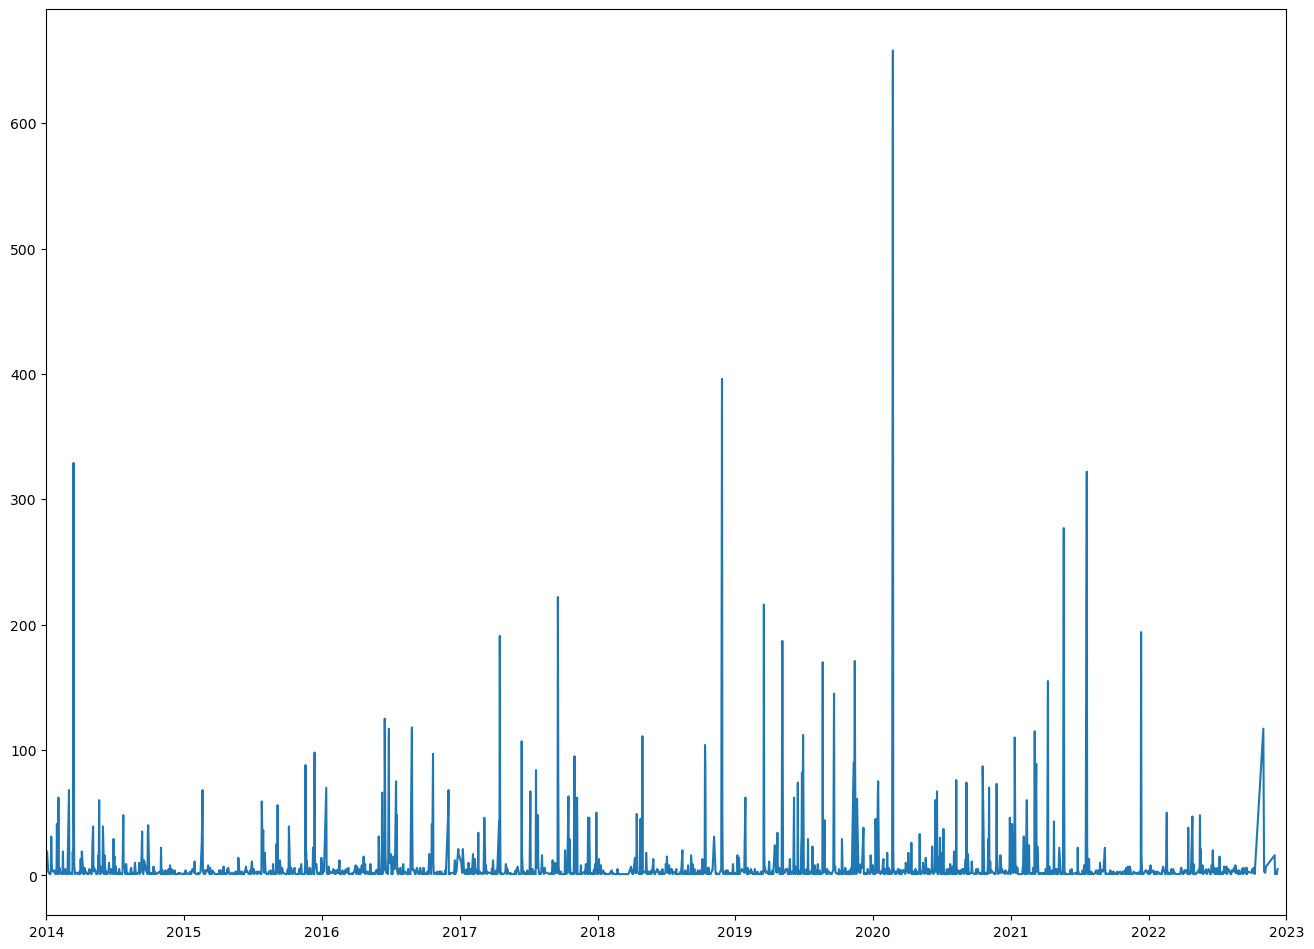

In [94]:
plt.figure(figsize=(16, 12),dpi=100)
plt.plot(dailyentry_counts["date"], dailyentry_counts["Entry"])
plt.xlim(left=pd.to_datetime("2014-01-01"),right=pd.to_datetime("2023-01-01"))
plt.show()

In [114]:
dailyentry_counts.sort_values("Entry", ascending=False).head(5)

,date,Entry
2968,2020-02-23,658
2655,2018-11-27,396
975,2010-11-28,392
1614,2014-03-14,329
3330,2021-07-21,322


# Visualizing N-Grams


## Top Bigrams


In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_bigram(df['Processed_Entry'], 30)

In [27]:
top_bigram = pd.DataFrame(common_words2, columns=['Processed_Entry', "Count"])
top_bigram.head()

,Processed_Entry,Count
0,kadıköy belediyesi,368
1,kentsel dönüşüm,234
2,haydarpaşa garı,173
3,bağdat caddesi,132
4,tek başına,117


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

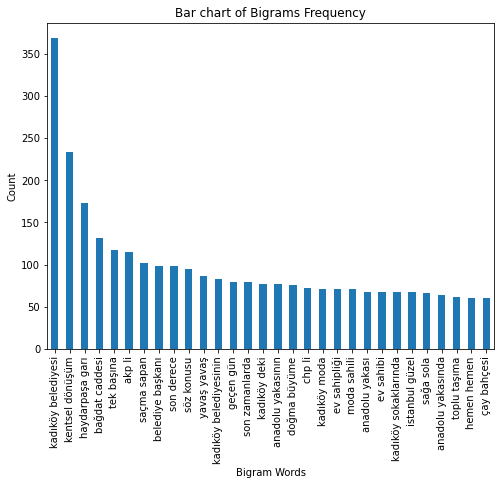

In [28]:
top_bigram.groupby('Processed_Entry').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency")

## Top Trigrams


In [30]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_trigram(df['Processed_Entry'], 30)
top_trigram = pd.DataFrame(common_words3, columns = ['Processed_Entry' , 'Count'])
top_trigram.head(5)

,Processed_Entry,Count
0,dolar blok metrekare,28
1,amaçsızca tek başına,27
2,allah belanızı versin,24
3,ali ismail korkmaz,24
4,kadıköy belediye başkanı,23


In [1]:
#top_trigram.groupby('Processed_Entry').sum()['Count'].sort_values(ascending=False).plot(
    #kind='bar',
    #figsize=(8,6),
    #xlabel = "Trigram Words",
    #ylabel = "Count",
    #dpi=100,
    #title = "Bar chart of Trigrams Frequency")

# WordCloud

In [41]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


In [42]:
words = []

for entry in df["Processed_Entry"]:
    for word in entry.split():
        words.append(word)

In [43]:
word_counts = pd.DataFrame(Counter(words).most_common(100)).rename({0: "word", 1: "count"}, axis=1)

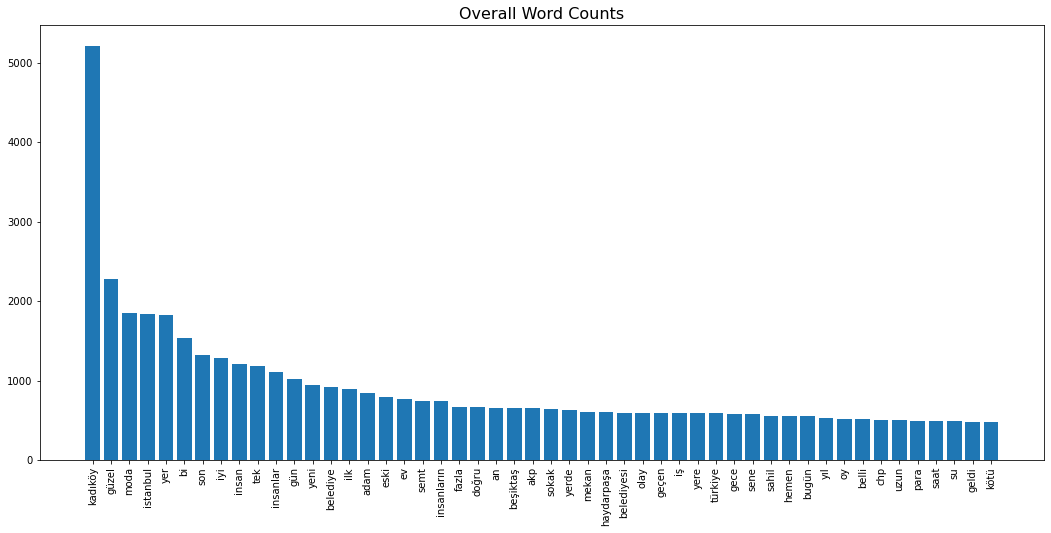

In [44]:
plt.figure(figsize=(18, 8))

plt.bar(word_counts["word"][:50], word_counts["count"][:50])
plt.xticks(rotation=90)
plt.title("Overall Word Counts", fontsize=16)
plt.show()

# Visualizing Top Words


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [46]:
common_words = get_top_n_words(df['Processed_Entry'], 20)
common_df = pd.DataFrame(common_words, columns = ['Processed_Entry', 'count'])
common_df.head()

,Processed_Entry,count
0,kadıköy,5211
1,güzel,2281
2,moda,1853
3,istanbul,1833
4,yer,1831


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

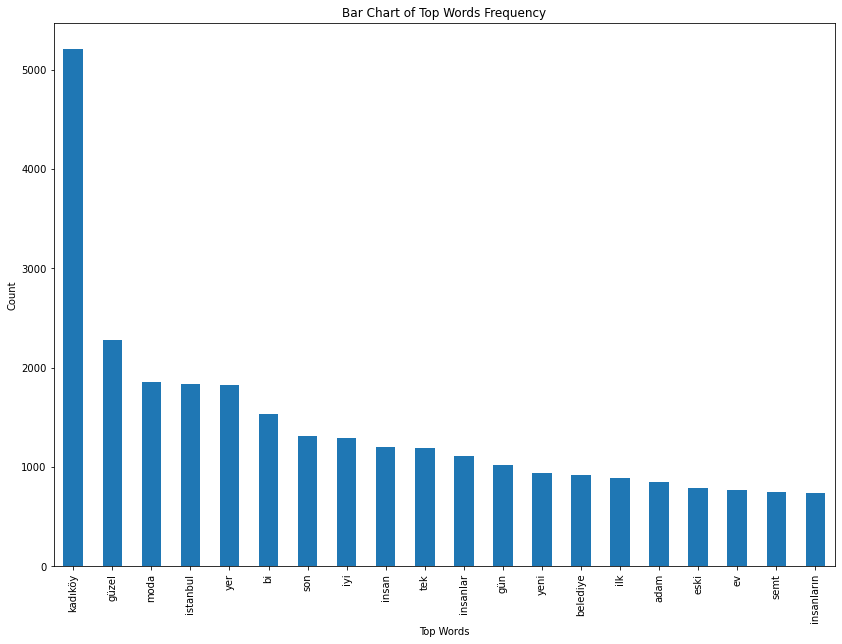

In [102]:
common_df.groupby('Processed_Entry').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(14, 10),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency")

# Word Frequency

In [87]:
#def word_freq(column):
#    
#    words = []
#    for item in column:
#        for word in item.split():
#            words.append(word)
#            
#    df = pd.concat([pd.Series(list(dict(Counter(words)).keys()), name="word"),
#                    pd.Series(list(dict(Counter(words)).values()), name="counts")], axis=1)
#    
#    df["freq"] = df["counts"] / df["counts"].sum()
#    
#    return df[["word", "counts", "freq"]].sort_values("freq", ascending=False).reset_index(drop=True)